In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
from sklearn.cluster import KMeans 
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df_prescaling = pd.read_csv('../../data/banking_transactions_output_data/df_encoded.csv')
# df_prescaling = pd.read_csv('df_encoded.csv')
df_prescaling.head()

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,numAccounts,incomeToSavingsRanking
0,0.000000,0.000000,0.000000,0,2
1,-0.046533,-114.890833,4.333333,3,3
2,0.031669,0.000000,0.000000,2,1
3,0.200000,-40.327500,7.750000,3,1
4,0.173563,-494.062727,9.000000,3,1


# K clustering

In [5]:
## Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = StandardScaler()

tmp = scaler.fit_transform(df_prescaling)
df = pd.DataFrame(tmp, columns=df_prescaling.columns)
df.describe()

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,numAccounts,incomeToSavingsRanking
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02
mean,2.140189e-17,-3.804780e-17,-2.794136e-17,8.798555e-17,-7.371762e-17
std,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00
min,-3.387060e+00,-4.972220e+00,-1.308712e+00,-1.886116e+00,-1.833190e+00
25%,-2.535894e-01,-4.426350e-01,-1.308712e+00,-8.775774e-01,-4.126579e-01
50%,7.547833e-02,4.418238e-01,5.828816e-01,1.309616e-01,6.085278e-02
75%,9.611169e-02,4.942748e-01,7.548447e-01,1.139501e+00,6.085278e-02
max,3.538017e+00,3.227522e+00,3.276969e+00,1.139501e+00,1.954896e+00


## Elbow method

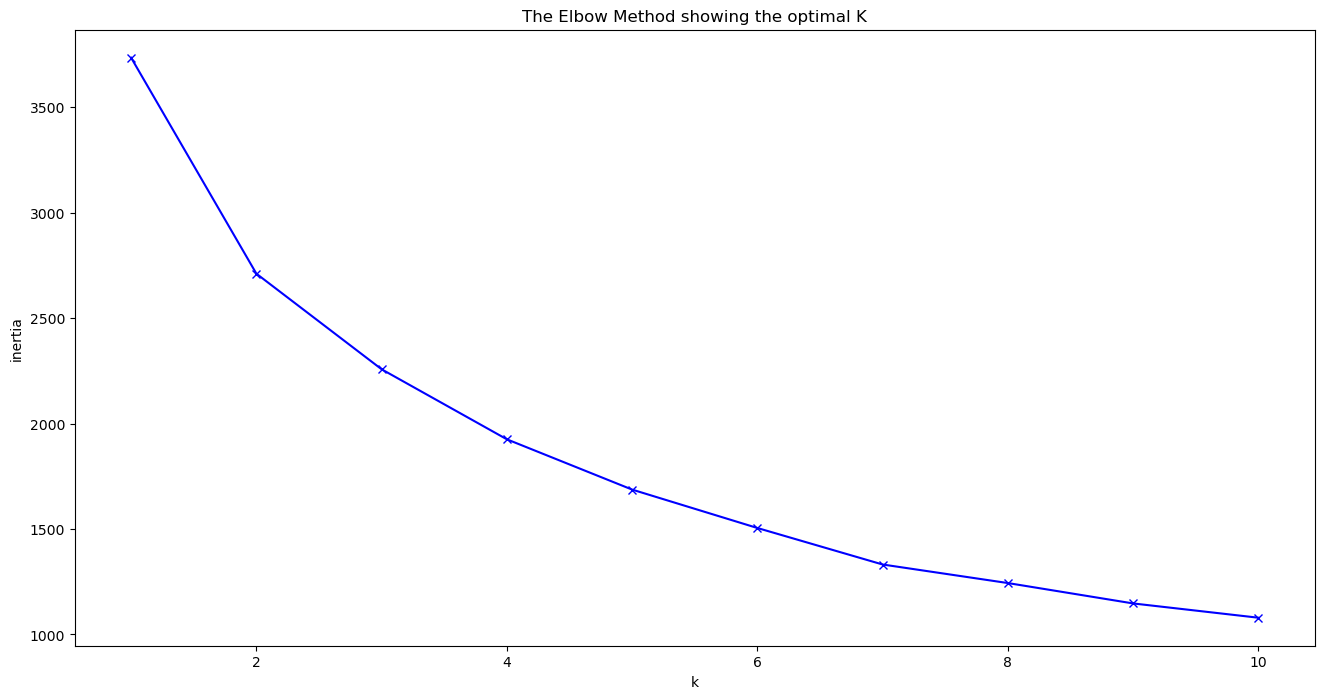

In [6]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

The elbow seems to sharpen at 4?

## Silhouette method

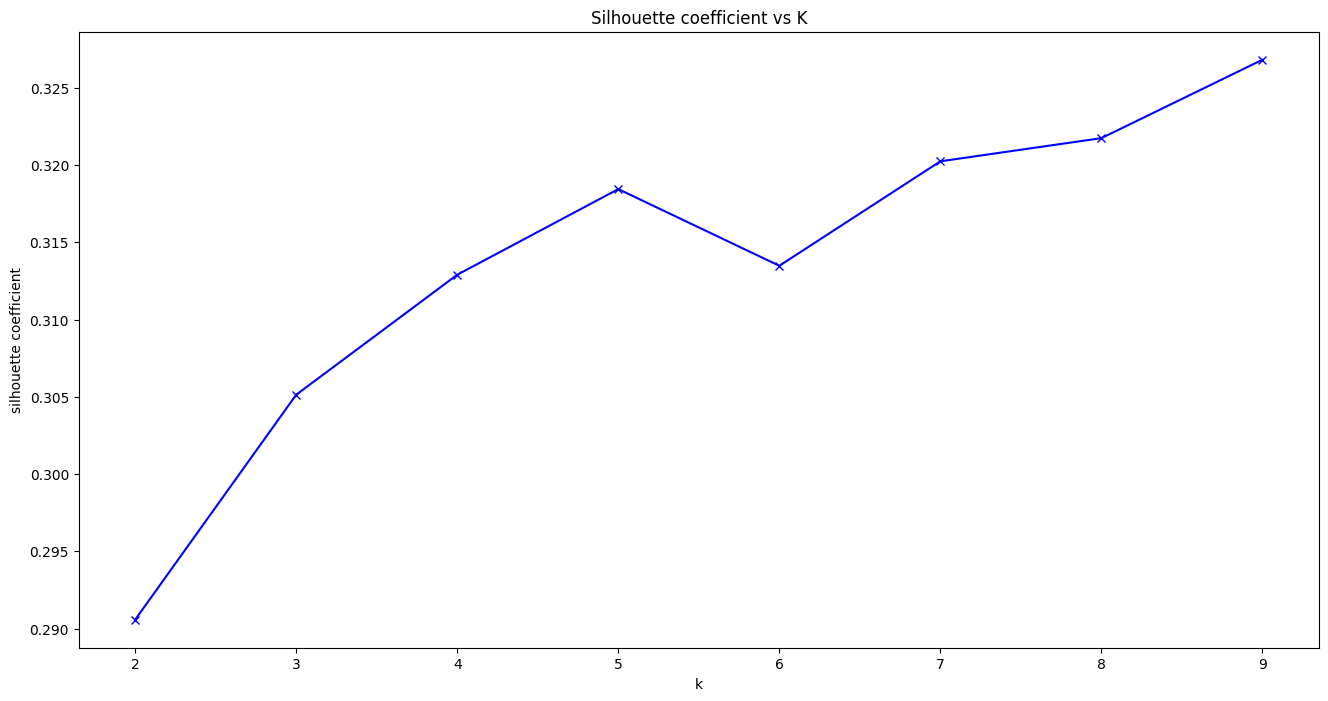

In [7]:
from sklearn.metrics import silhouette_score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    label=kmeanModel.predict(df)
    silhouettes.append(silhouette_score(df,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [7]:
# fitting with the optimum n_clusters

kmeanModel = KMeans(n_clusters=5).fit(df)
cluster_means = kmeanModel.cluster_centers_
cluster_means

array([[ 1.93462668,  0.16000016, -0.09633592,  0.50174796, -0.17590257],
       [-0.00337316, -1.79931148,  0.63656498,  0.06307912,  0.04264083],
       [-0.35704826,  0.25197583,  0.76557683,  0.44395642,  0.74662689],
       [-0.10151293,  0.48531976, -1.24949108, -1.11488075,  0.04799729],
       [-0.21257582,  0.0863469 ,  0.31862122,  0.84189889, -1.44506647]])

In [8]:
cluster_means = np.array([[ 1.96860302,  0.15355098, -0.11004718,  0.50334519, -0.23053842],
       [-0.30399153,  0.06765159,  0.66126347,  0.9554606 ,  1.29128932],
       [-0.26218049,  0.12894983,  0.77191636, -0.24205972,  0.06733923],
       [-0.10566269,  0.47783266, -1.277836  , -1.1355758 ,  0.03882903],
       [-0.0089968 , -2.52254103,  0.66727631,  0.21643097, -0.03545448],
       [-0.19828572,  0.06416114,  0.31380498,  0.8248364 , -1.42407675]])

In [9]:
df.columns

Index(['creditSpendtoLimitRatio', 'averageMonthlySpending',
       'numTnxMonthlyAverage', 'numAccounts', 'incomeToSavingsRanking'],
      dtype='object')

## Visualize with Radial plot

In [10]:
import plotly.graph_objects as go

for i, cluster in enumerate(cluster_means):
    
    columns = list(df.columns)
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=cluster,
          theta=columns,
          fill='toself',
          name='Cluster ' + str(i)
    ))


    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )

    fig.show()

# PCA for visualization

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
df_pca = pca.fit(df)
df_pca

PCA()

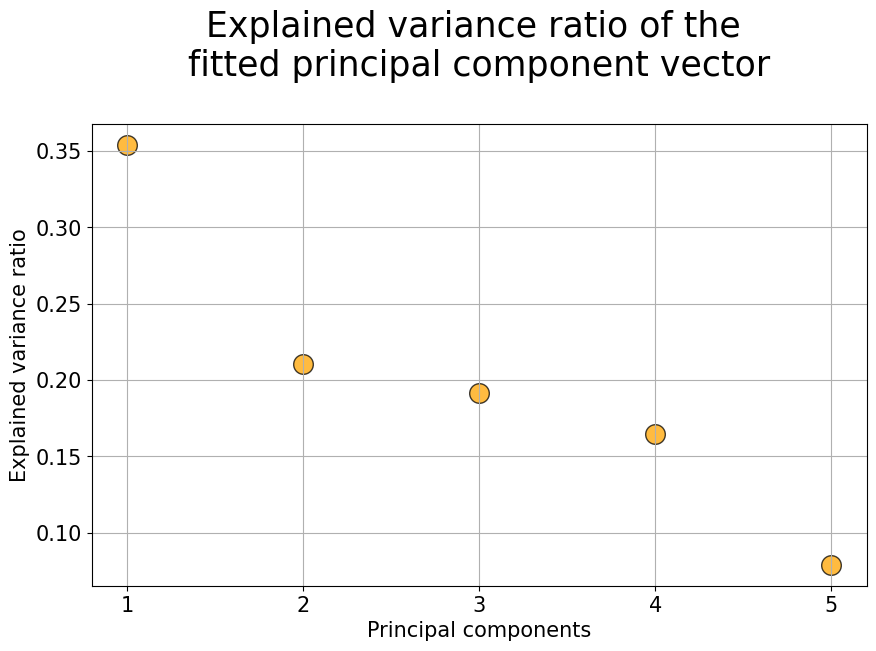

In [13]:
# Expanded variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**Note**: Looks like the first 4 principal components are significant. Well I can only plot a 2D image with the first 2. :()

## Visualizing class separation with PCA

In [14]:
# applying K-clusters method to the PCA 
labels = kmeanModel.fit_predict(pca.transform(df))

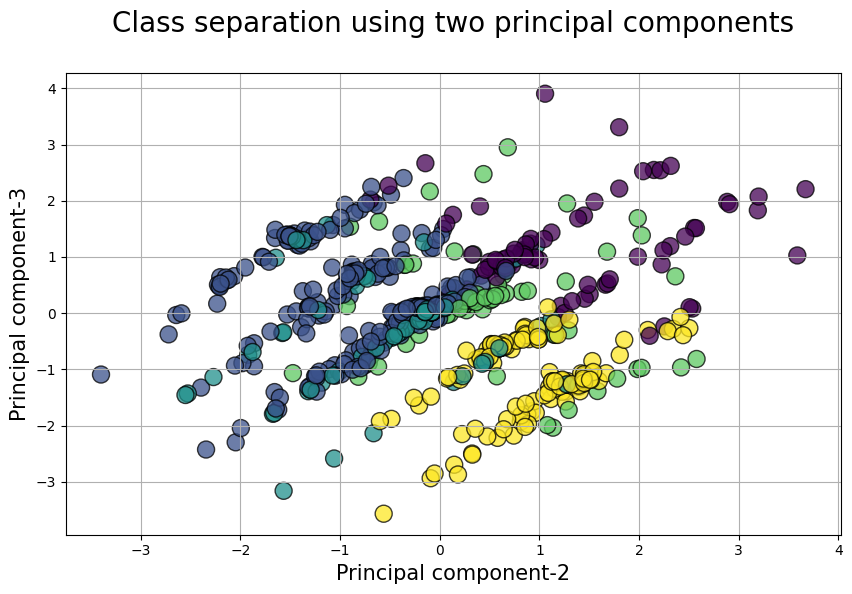

In [15]:
# plot the scatter diagram

df_trans = pca.transform(df)
df_trans = pd.DataFrame(data=df_trans)

plt.figure(figsize=(10,6))
plt.scatter(df_trans[1],df_trans[2],c=labels,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using two principal components\n",fontsize=20)
plt.xlabel("Principal component-2",fontsize=15)
plt.ylabel("Principal component-3",fontsize=15)
plt.show()
